In [62]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
blastchar_telco_customer_churn_path = kagglehub.dataset_download('blastchar/telco-customer-churn')

print('Data source import complete.')


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Data source import complete.


In [63]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [64]:
import pandas as pd
import numpy as np


In [65]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [67]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [68]:
df.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [69]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isna().sum()   # check missing after conversion


np.int64(11)

In [70]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)
df["TotalCharges"].isna().sum()   # check missing after conversion


np.int64(0)

In [71]:
df["Churn"].value_counts(normalize=True)


,proportion
Churn,
No,0.73463
Yes,0.26537


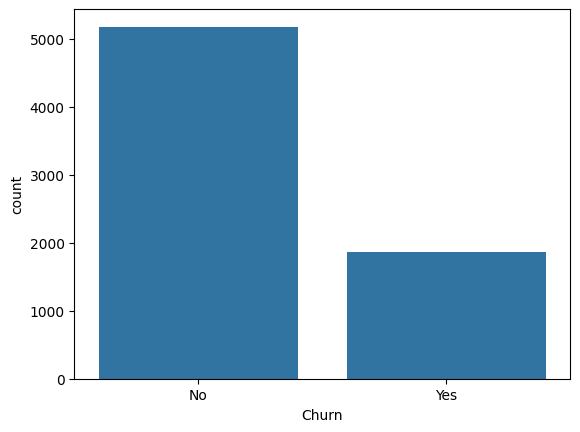

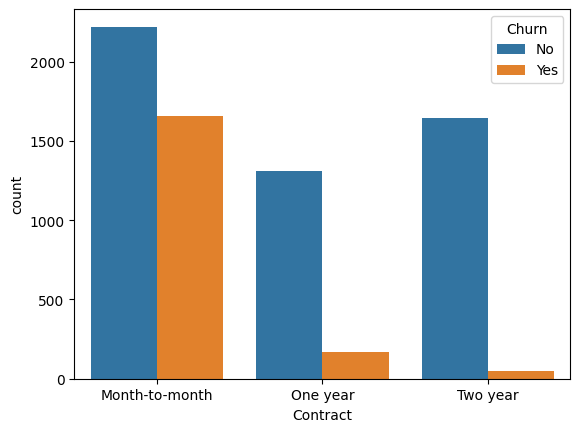

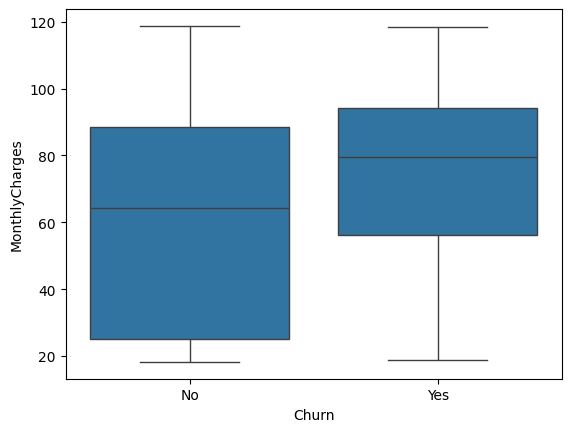

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.show()

sns.countplot(x="Contract", hue="Churn", data=df)
plt.show()

sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.show()


In [73]:
df = df.drop("customerID", axis=1)


In [74]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [75]:
# Binary encoding
df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
df["Partner"] = df["Partner"].map({"No": 0, "Yes": 1})
df["Dependents"] = df["Dependents"].map({"No": 0, "Yes": 1})
df["PhoneService"] = df["PhoneService"].map({"No": 0, "Yes": 1})
df["PaperlessBilling"] = df["PaperlessBilling"].map({"No": 0, "Yes": 1})
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})  # Target variable



In [76]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [77]:
df = pd.get_dummies(
    df,
    columns=[
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaymentMethod"
    ], drop_first= True
)


In [78]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,True,False,True,False,True,True,False,False,False,True
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,True,False,True,False,False
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,False,False,True


In [79]:
# Convert all bool columns to int (True -> 1, False -> 0)
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})


In [80]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


In [81]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


In [82]:
print(df["Churn"].unique())
print(df["Churn"].value_counts())


[0 1]
Churn
0    5174
1    1869
Name: count, dtype: int64


In [83]:
df["Churn"].head()


,Churn
0,0
1,0
2,1
3,0
4,1


In [84]:

# Derived Features
df["AvgChargesPerMonth"] = df.apply(
    lambda row: row["TotalCharges"] / row["tenure"] if row["tenure"] > 0 else row["MonthlyCharges"],
    axis=1
)

df["TenureGroup"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12", "13-24", "25-48", "49-72"],
    right=True
)

# Select all dummy columns that represent service subscriptions
service_dummy_cols = [col for col in df.columns if col.startswith((
    "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"
))]

# Count how many of these services each customer has (i.e., value=1)
df["ServicesCount"] = df[service_dummy_cols].sum(axis=1)

# Encode only TenureGroup (since all others are already encoded)
df = pd.get_dummies(df, columns=["TenureGroup"], drop_first=True)

# Scale new numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["AvgChargesPerMonth", "ServicesCount"]] = scaler.fit_transform(df[["AvgChargesPerMonth", "ServicesCount"]])

print(df.head())
print(df.shape)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3         

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 6. Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [87]:
# Logistic Regression
lr = LogisticRegression(random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [88]:
# Logistic Regression
lr.fit(X_train_scaled, y_train)

# Decision Tree (scaling is not necessary, but fine to use scaled data)
dt.fit(X_train_scaled, y_train)

# XGBoost
xgb.fit(X_train_scaled, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:29:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [89]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)


In [90]:
for name, y_pred in zip(["Logistic Regression", "Decision Tree", "XGBoost"],
                        [y_pred_lr, y_pred_dt, y_pred_xgb]):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.7991483321504613
Confusion Matrix:
 [[931 104]
 [179 195]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



--- Decision Tree ---
Accuracy: 0.7395315826827538
Confusion Matrix:
 [[849 186]
 [181 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1035
           1       0.51      0.52      0.51       374

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409



--- XGBoost ---
Accuracy: 0.7806955287437899
Confusion Matrix:
 [[911 124]
 [185 189]]
Classification 

In [91]:
!pip uninstall scikit-learn -y
!pip install scikit-learn


Found existing installation: scikit-learn 1.7.1
Uninstalling scikit-learn-1.7.1:
  Successfully uninstalled scikit-learn-1.7.1
  Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)


In [92]:
!pip install --upgrade imbalanced-learn


In [93]:

  # Logistic Regression
  lr = LogisticRegression(class_weight='balanced', random_state=42)
  lr.fit(X_train_scaled, y_train)

  # Decision Tree
  dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
  dt.fit(X_train_scaled, y_train)

  # XGBoost
  scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
  xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
  xgb.fit(X_train_scaled, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:30:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [94]:
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:,1]
y_pred_lr = (y_pred_proba_lr > 0.3).astype(int)

y_pred_proba_xgb = xgb.predict_proba(X_test_scaled)[:,1]
y_pred_xgb = (y_pred_proba_xgb > 0.3).astype(int)


In [95]:
  from sklearn.metrics import classification_report, confusion_matrix

  for name, y_pred in zip(["Logistic Regression", "Decision Tree", "XGBoost"],
                          [y_pred_lr, dt.predict(X_test_scaled), y_pred_xgb]):
      print(f"--- {name} ---")
      print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
      print("Classification Report:\n", classification_report(y_test, y_pred))
      print("\n")


--- Logistic Regression ---
Confusion Matrix:
 [[571 464]
 [ 28 346]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70      1035
           1       0.43      0.93      0.58       374

    accuracy                           0.65      1409
   macro avg       0.69      0.74      0.64      1409
weighted avg       0.81      0.65      0.67      1409



--- Decision Tree ---
Confusion Matrix:
 [[860 175]
 [192 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1035
           1       0.51      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



--- XGBoost ---
Confusion Matrix:
 [[729 306]
 [ 74 300]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91

In [96]:
# Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

# XGBoost
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
xgb.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:30:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [97]:
# Logistic Regression threshold tuning
y_pred_proba_lr = lr.predict_proba(X_test)[:,1]
y_pred_lr = (y_pred_proba_lr > 0.3).astype(int)  # lower threshold for higher recall

# XGBoost threshold tuning
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]
y_pred_xgb = (y_pred_proba_xgb > 0.3).astype(int)


In [98]:
# Average predicted probabilities
y_pred_ensemble_proba = (y_pred_proba_lr + y_pred_proba_xgb) / 2
y_pred_ensemble = (y_pred_ensemble_proba > 0.3).astype(int)


In [99]:
models = {
    "Logistic Regression": y_pred_lr,
    "XGBoost": y_pred_xgb,
    "Ensemble": y_pred_ensemble
}

for name, y_pred in models.items():
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.6550745209368346
Confusion Matrix:
 [[575 460]
 [ 26 348]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.56      0.70      1035
           1       0.43      0.93      0.59       374

    accuracy                           0.66      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.82      0.66      0.67      1409



--- XGBoost ---
Accuracy: 0.730305180979418
Confusion Matrix:
 [[729 306]
 [ 74 300]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409



--- Ensemble ---
Accuracy: 0.7054648687012065
Confusion Matrix:
 [[671 364]
 [ 51 323]]
Classification Report

In [100]:
# Predicted probabilities
y_proba_lr = lr.predict_proba(X_test)[:,1]
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

# Weighted ensemble: give 0.6 weight to LR, 0.4 to XGBoost
y_proba_ensemble = 0.6*y_proba_lr + 0.4*y_proba_xgb

# Apply threshold tuning
threshold = 0.32  # can experiment 0.3–0.35
y_pred_ensemble = (y_proba_ensemble > threshold).astype(int)


In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("--- Weighted Ensemble ---")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))


--- Weighted Ensemble ---
Accuracy: 0.7012065294535131
Confusion Matrix:
 [[665 370]
 [ 51 323]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.64      0.76      1035
           1       0.47      0.86      0.61       374

    accuracy                           0.70      1409
   macro avg       0.70      0.75      0.68      1409
weighted avg       0.81      0.70      0.72      1409



In [102]:
import numpy as np
from sklearn.metrics import f1_score

# Candidate thresholds and weights
thresholds = np.arange(0.28, 0.36, 0.02)  # 0.28, 0.30, 0.32, 0.34
lr_weights = np.arange(0.5, 0.71, 0.05)   # 0.5, 0.55, 0.6, 0.65, 0.7

best_f1 = 0
best_params = {}
results = []

# Predicted probabilities from trained models
y_proba_lr = lr.predict_proba(X_test)[:,1]
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

for w in lr_weights:
    for t in thresholds:
        # Weighted ensemble
        y_proba_ensemble = w*y_proba_lr + (1-w)*y_proba_xgb
        y_pred_ensemble = (y_proba_ensemble > t).astype(int)

        # Compute F1-score for churners (class 1)
        f1 = f1_score(y_test, y_pred_ensemble, pos_label=1)

        # Save results
        results.append({'lr_weight': w, 'threshold': t, 'f1_churn': f1})

        # Track best
        if f1 > best_f1:
            best_f1 = f1
            best_params = {'lr_weight': w, 'threshold': t}

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by='f1_churn', ascending=False)
print("Top 5 combinations:")
print(results_df.head())

print("\nBest combination:", best_params, "with F1-score:", best_f1)


Top 5 combinations:
    lr_weight  threshold  f1_churn
7        0.55       0.34  0.612560
3        0.50       0.34  0.612086
11       0.60       0.34  0.611697
2        0.50       0.32  0.609195
6        0.55       0.32  0.608944

Best combination: {'lr_weight': np.float64(0.55), 'threshold': np.float64(0.3400000000000001)} with F1-score: 0.6125603864734299


In [103]:
y_final_proba = 0.5*y_proba_lr + 0.5*y_proba_xgb
y_final_pred = (y_final_proba > 0.34).astype(int)


In [104]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_final_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_final_pred))
print("Classification Report:\n", classification_report(y_test, y_final_pred))


Accuracy: 0.7175301632363378
Confusion Matrix:
 [[697 338]
 [ 60 314]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.78      1035
           1       0.48      0.84      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.80      0.72      0.73      1409



In [125]:
import joblib

# Save trained model columns
trained_columns = X_train.columns
joblib.dump(trained_columns, "trained_columns.pkl")

# Save models and scaler
joblib.dump(lr, "logistic_model.pkl")
joblib.dump(xgb, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [126]:
import shap
import matplotlib.pyplot as plt

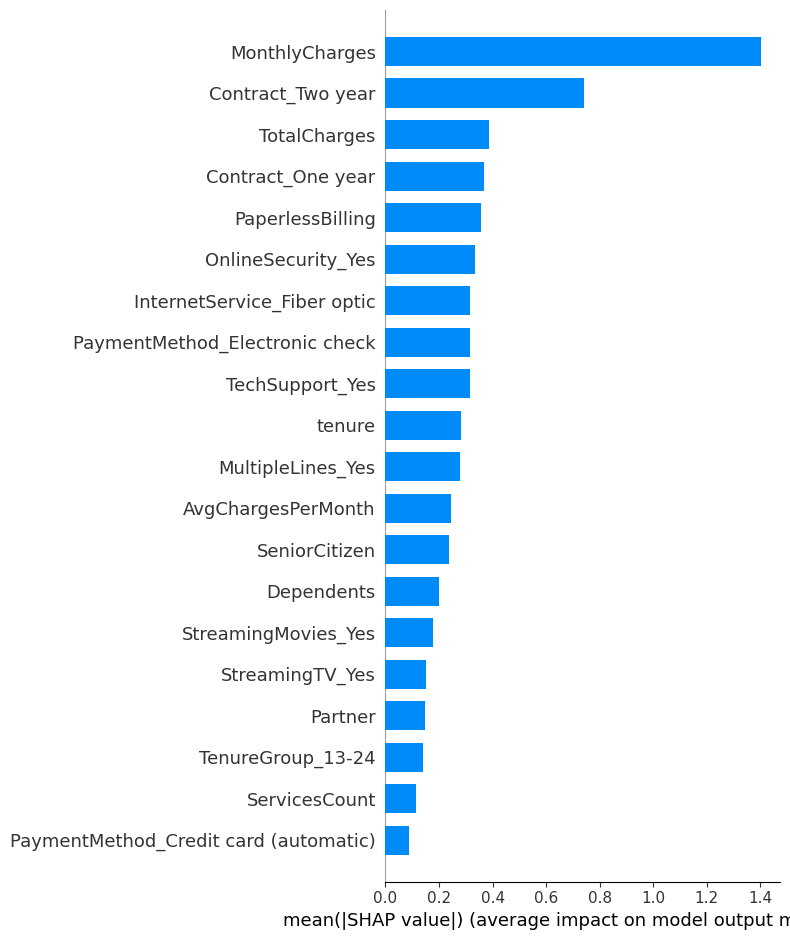

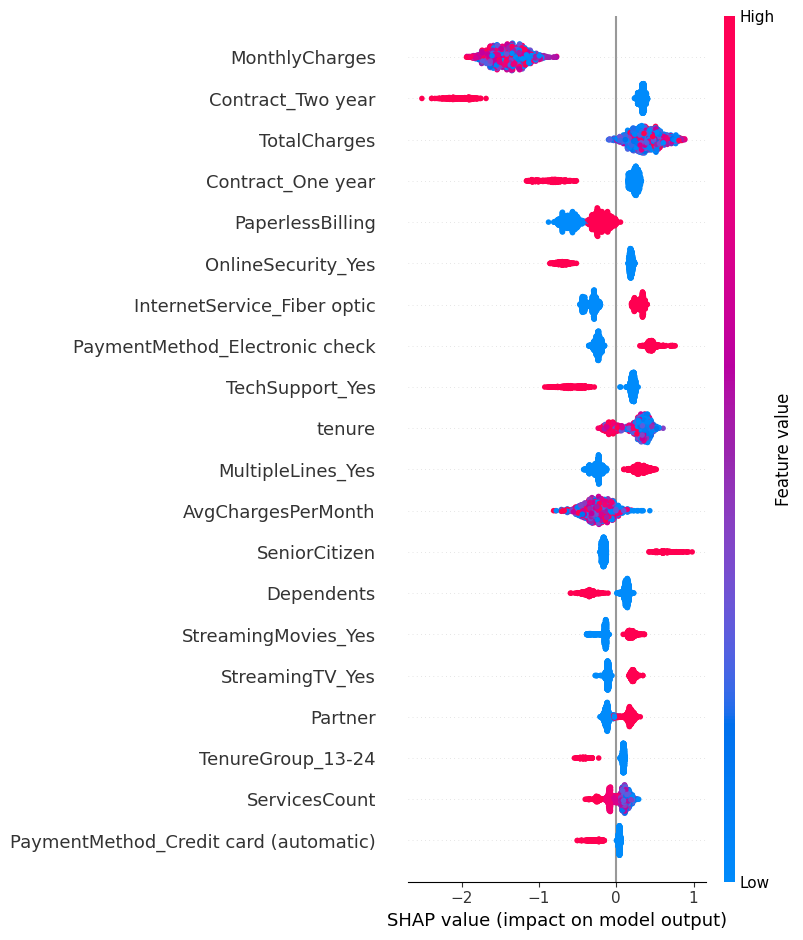

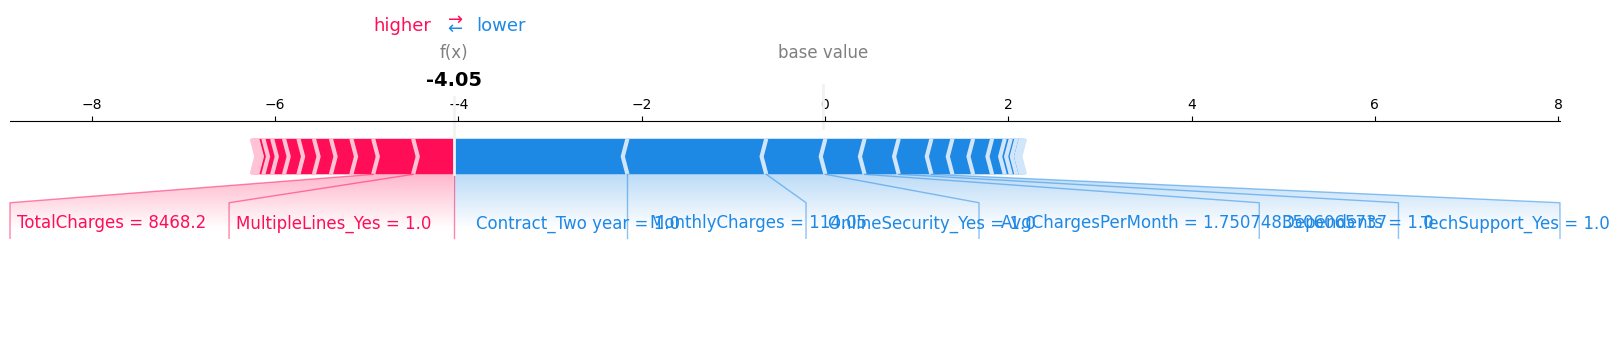

In [127]:

# 1. XGBoost Explainer
# ----------------------------
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled)

# ----------------------------
# 2. Logistic Regression Explainer
# ----------------------------
# Use Masker instead of feature_perturbation
masker_lr = shap.maskers.Independent(X_train_scaled)
explainer_lr = shap.LinearExplainer(lr, masker=masker_lr)
shap_values_lr = explainer_lr.shap_values(X_test_scaled)

# ----------------------------
# 3. Weighted Ensemble SHAP
# ----------------------------
# Combine shap values based on your ensemble weights (0.5 LR + 0.5 XGB)
shap_values_ensemble = 0.5*shap_values_lr + 0.5*shap_values_xgb

# ----------------------------
# 4. Global Feature Importance
# ----------------------------
# Bar plot
shap.summary_plot(shap_values_ensemble, X_test, plot_type="bar")

# Beeswarm plot
shap.summary_plot(shap_values_ensemble, X_test)

# ----------------------------
# 5. Individual Customer Explanation (optional)
# ----------------------------
# Pick a single customer (e.g., index 0)
shap.initjs()
shap.force_plot(
    explainer_xgb.expected_value,
    shap_values_ensemble[0,:],
    X_test.iloc[0,:],
    matplotlib=True
)


In [128]:
# Predicted probabilities from your ensemble
y_proba_ensemble = 0.5*lr.predict_proba(X_test_scaled)[:,1] + 0.5*xgb.predict_proba(X_test_scaled)[:,1]

# Define risk segments
risk_df = X_test.copy()
risk_df['Churn_Prob'] = y_proba_ensemble

risk_df['RiskSegment'] = pd.cut(
    risk_df['Churn_Prob'],
    bins=[0, 0.4, 0.7, 1],
    labels=['Low', 'Medium', 'High']
)

risk_df['RiskSegment'].value_counts()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,count
RiskSegment,
Low,929
Medium,381
High,99


In [129]:
def retention_action(row):
    if row['RiskSegment'] == 'High':
        return "Personalized discount / loyalty offer"
    elif row['RiskSegment'] == 'Medium':
        return "Engagement email / upsell suggestion"
    else:
        return "No action needed"

risk_df['RetentionAction'] = risk_df.apply(retention_action, axis=1)

# Check distribution
risk_df.groupby(['RiskSegment', 'RetentionAction']).size()


/tmp/ipython-input-1560527038.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_df.groupby(['RiskSegment', 'RetentionAction']).size()


RiskSegment  RetentionAction                      
Low          Engagement email / upsell suggestion       0
             No action needed                         929
             Personalized discount / loyalty offer      0
Medium       Engagement email / upsell suggestion     381
             No action needed                           0
             Personalized discount / loyalty offer      0
High         Engagement email / upsell suggestion       0
             No action needed                           0
             Personalized discount / loyalty offer     99
dtype: int64

In [130]:
# If you already have the ensemble probabilities
y_proba_ensemble = 0.5*lr.predict_proba(X_test_scaled)[:,1] + 0.5*xgb.predict_proba(X_test_scaled)[:,1]

# Add to test dataframe
risk_df = X_test.copy()
risk_df['Churn_Prob'] = y_proba_ensemble

# If MonthlyCharges is not in X_test, merge it from original df
risk_df['MonthlyCharges'] = df.loc[risk_df.index, 'MonthlyCharges']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [131]:
risk_df['RiskSegment'] = pd.cut(
    risk_df['Churn_Prob'],
    bins=[0, 0.4, 0.7, 1],
    labels=['Low', 'Medium', 'High']
)


In [132]:
# Expected monthly revenue to save per customer
risk_df['ExpectedRevenue'] = risk_df['Churn_Prob'] * risk_df['MonthlyCharges']

# Total expected revenue recovery
total_expected_revenue = risk_df['ExpectedRevenue'].sum()
print("Total expected revenue recovery: $", round(total_expected_revenue, 2))


Total expected revenue recovery: $ 31546.7


In [133]:
high_risk = risk_df[risk_df['RiskSegment']=='High']
high_risk_revenue = high_risk['ExpectedRevenue'].sum()
print("Expected revenue recovery from high-risk customers: $", round(high_risk_revenue, 2))


Expected revenue recovery from high-risk customers: $ 7145.28


In [134]:

expected_tenure_remaining = 12

risk_df['CLV'] = risk_df['MonthlyCharges'] * expected_tenure_remaining


In [135]:
# Expected revenue recovery per customer
risk_df['ExpectedRevenueRecovery'] = risk_df['Churn_Prob'] * risk_df['CLV']

# Total expected revenue recovery
total_expected_revenue = risk_df['ExpectedRevenueRecovery'].sum()
print("Total expected revenue recovery (using CLV): $", round(total_expected_revenue, 2))


Total expected revenue recovery (using CLV): $ 378560.38


In [136]:
high_risk = risk_df[risk_df['RiskSegment']=='High']
high_risk_revenue = high_risk['ExpectedRevenueRecovery'].sum()
print("Expected revenue recovery from high-risk customers: $", round(high_risk_revenue, 2))


Expected revenue recovery from high-risk customers: $ 85743.37


In [137]:

# --- Step 1: Prepare the risk dataframe ---
# Use your test set
risk_df = X_test.copy()
risk_df['Churn_Prob'] = y_proba_ensemble  # predicted probabilities from your weighted ensemble
risk_df['ActualChurn'] = y_test.values

# --- Step 2: Reconstruct ContractType from dummy columns ---
def get_contract_type(row):
    if 'Contract_One year' in row and row['Contract_One year'] == 1:
        return 'One year'
    elif 'Contract_Two year' in row and row['Contract_Two year'] == 1:
        return 'Two year'
    else:
        return 'Month-to-month'

risk_df['ContractType'] = risk_df.apply(get_contract_type, axis=1)

# --- Step 3: Expected Tenure Remaining ---
contract_months = {'Month-to-month': 1, 'One year': 12, 'Two year': 24}
risk_df['ExpectedTenureRemaining'] = risk_df['ContractType'].map(contract_months)

# Optional: if you want to use max tenure minus current tenure
# risk_df['ExpectedTenureRemaining'] = 72 - df.loc[risk_df.index, 'tenure']

# --- Step 4: Compute CLV ---
# Using simple CLV = MonthlyCharges * ExpectedTenureRemaining
# If MonthlyCharges column was scaled, use original unscaled values
if 'MonthlyCharges' in risk_df.columns:
    monthly_charges_col = 'MonthlyCharges'
else:
    monthly_charges_col = 'MonthlyCharges_original'  # if you stored original before scaling

risk_df['CLV'] = df.loc[risk_df.index, 'MonthlyCharges'] * risk_df['ExpectedTenureRemaining']

# --- Step 5: Expected Revenue Recovery ---
risk_df['ExpectedRevenueRecovery'] = risk_df['Churn_Prob'] * risk_df['CLV']

# --- Step 6: Segment Customers by Risk ---
risk_df['RiskSegment'] = pd.cut(
    risk_df['Churn_Prob'],
    bins=[0, 0.4, 0.7, 1],
    labels=['Low', 'Medium', 'High']
)

# --- Step 7: Assign Retention Actions ---
def retention_action(row):
    if row['RiskSegment'] == 'High':
        return "Personalized discount / loyalty offer"
    elif row['RiskSegment'] == 'Medium':
        return "Engagement email / upsell"
    else:
        return "No action needed"

risk_df['RetentionAction'] = risk_df.apply(retention_action, axis=1)

# --- Step 8: Summarize expected revenue recovery ---
total_revenue = risk_df['ExpectedRevenueRecovery'].sum()
high_risk_revenue = risk_df[risk_df['RiskSegment']=='High']['ExpectedRevenueRecovery'].sum()

print("Total expected revenue recovery: $", round(total_revenue, 2))
print("Expected revenue recovery from high-risk customers: $", round(high_risk_revenue, 2))

# --- Optional: show top 10 high-risk customers ---
top_high_risk = risk_df[risk_df['RiskSegment']=='High'].sort_values(
    by='ExpectedRevenueRecovery', ascending=False
).head(10)

top_high_risk[['Churn_Prob', 'CLV', 'ExpectedRevenueRecovery', 'RetentionAction']]


Total expected revenue recovery: $ 149300.94
Expected revenue recovery from high-risk customers: $ 15533.45


,Churn_Prob,CLV,ExpectedRevenueRecovery,RetentionAction
978,0.860497,1245.0,1071.319050,Personalized discount / loyalty offer
1441,0.887758,1173.6,1041.872791,Personalized discount / loyalty offer
3869,0.802223,1179.0,945.821201,Personalized discount / loyalty offer
4792,0.737123,1275.0,939.831637,Personalized discount / loyalty offer
6974,0.762832,1186.2,904.871494,Personalized discount / loyalty offer
4577,0.702703,1258.2,884.141052,Personalized discount / loyalty offer
4824,0.750941,1167.0,876.347607,Personalized discount / loyalty offer
3476,0.716302,1209.0,866.009531,Personalized discount / loyalty offer
5619,0.752219,1092.0,821.422867,Personalized discount / loyalty offer
2457,0.734596,1087.8,799.093007,Personalized discount / loyalty offer


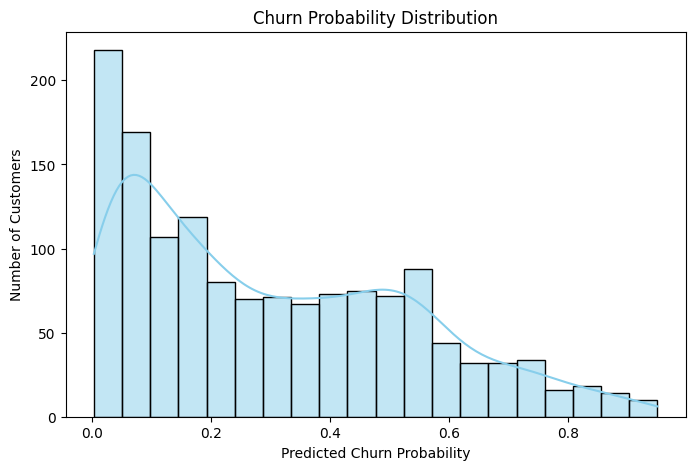

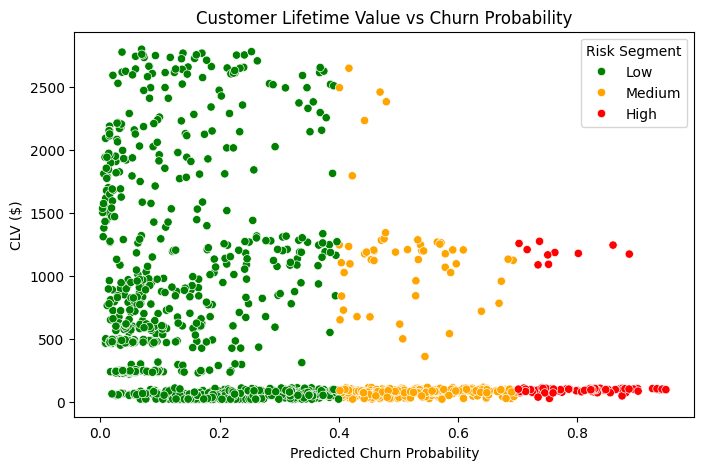

/tmp/ipython-input-454792794.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RiskSegment', y='ExpectedRevenueRecovery', data=risk_df, estimator=np.sum, palette=['green','orange','red'])


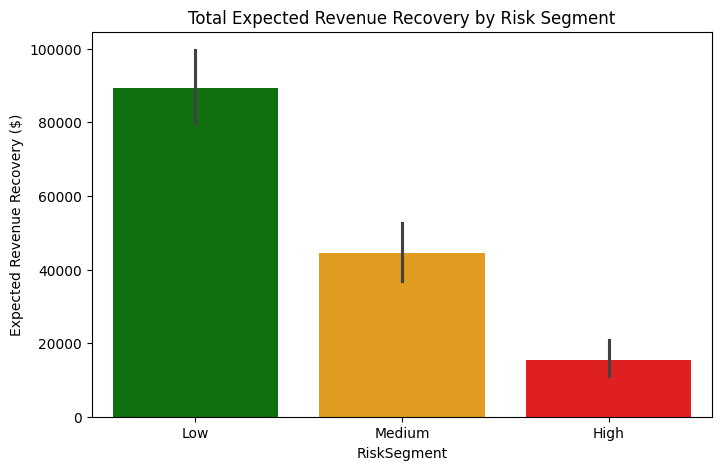

/tmp/ipython-input-454792794.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_high_risk.index, y=top_high_risk['ExpectedRevenueRecovery'], palette='Reds_r')


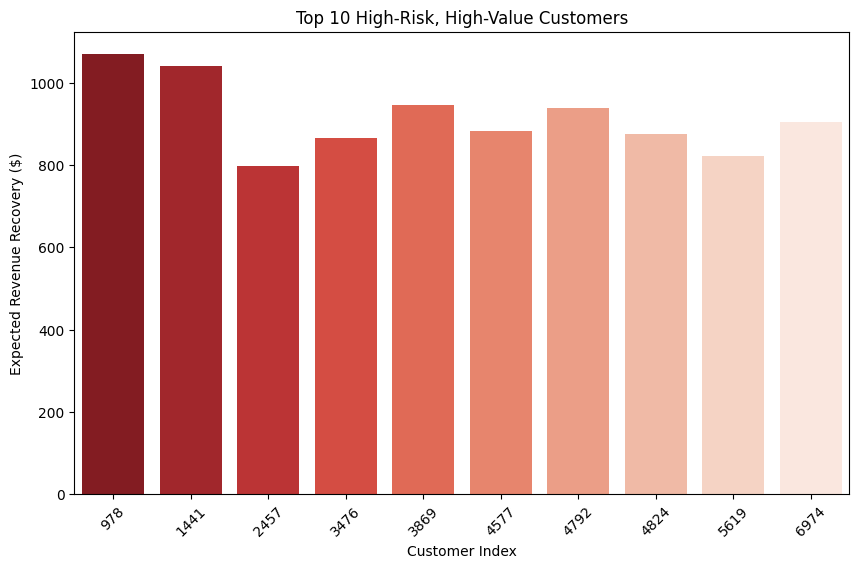

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Churn Probability Distribution ---
plt.figure(figsize=(8,5))
sns.histplot(risk_df['Churn_Prob'], bins=20, kde=True, color='skyblue')
plt.title("Churn Probability Distribution")
plt.xlabel("Predicted Churn Probability")
plt.ylabel("Number of Customers")
plt.show()

# --- Step 2: CLV vs Churn Probability ---
plt.figure(figsize=(8,5))
sns.scatterplot(x='Churn_Prob', y='CLV', hue='RiskSegment', data=risk_df, palette=['green','orange','red'])
plt.title("Customer Lifetime Value vs Churn Probability")
plt.xlabel("Predicted Churn Probability")
plt.ylabel("CLV ($)")
plt.legend(title='Risk Segment')
plt.show()

# --- Step 3: Expected Revenue Recovery by Risk Segment ---
plt.figure(figsize=(8,5))
sns.barplot(x='RiskSegment', y='ExpectedRevenueRecovery', data=risk_df, estimator=np.sum, palette=['green','orange','red'])
plt.title("Total Expected Revenue Recovery by Risk Segment")
plt.ylabel("Expected Revenue Recovery ($)")
plt.show()

# --- Step 4: Highlight Top 10 High-Risk, High-Value Customers ---
top_high_risk = risk_df[risk_df['RiskSegment']=='High'].sort_values(by='ExpectedRevenueRecovery', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_high_risk.index, y=top_high_risk['ExpectedRevenueRecovery'], palette='Reds_r')
plt.title("Top 10 High-Risk, High-Value Customers")
plt.ylabel("Expected Revenue Recovery ($)")
plt.xlabel("Customer Index")
plt.xticks(rotation=45)
plt.show()


In [119]:
!pip install streamlit


In [180]:
%%writefile app.py
# app.py

import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load trained objects
lr = joblib.load("/content/logistic_model.pkl")
xgb = joblib.load("/content/xgb_model.pkl")
scaler = joblib.load("/content/scaler.pkl")

# LOAD both trained_columns and numeric columns
with open("/content/trained_columns.pkl", "rb") as f:
    loaded = joblib.load(f)
    # If saved as dictionary
    if isinstance(loaded, dict):
        trained_columns = loaded["trained_columns"]   # List of all feature columns
        num_cols_train = loaded["num_cols_train"]     # List of numeric columns
    elif isinstance(loaded, list):  # If only trained_columns list present
        trained_columns = loaded
        num_cols_train = []  # Fallback, update with your numeric cols
    else:
        # If only numeric columns are present
        num_cols_train = loaded
        trained_columns = num_cols_train  # Fallback

st.title("Churn Prediction & Revenue Impact")

uploaded_file = st.file_uploader("Upload CSV", type="csv")

if uploaded_file:
    df_new = pd.read_csv(uploaded_file)
    st.write("Raw Data", df_new.head())

    # --- 1. Ensure numeric conversion ---
    for col in num_cols_train:
        if col in df_new.columns:
            df_new[col] = pd.to_numeric(df_new[col], errors="coerce").fillna(0)
        else:
            df_new[col] = 0  # missing numeric columns set to 0

    # --- 2. Ensure all trained columns exist ---
    for col in trained_columns:
        if col not in df_new.columns:
            df_new[col] = 0  # missing categorical/dummy columns

    # --- 3. Reorder columns exactly like training ---
    df_new = df_new[trained_columns]

    # --- 4. Scale numeric columns ---
    df_new[num_cols_train] = scaler.transform(df_new[num_cols_train])

    # --- 5. Predict probabilities ---
    y_proba_lr = lr.predict_proba(df_new)[:, 1]
    y_proba_xgb = xgb.predict_proba(df_new)[:, 1]

    # Combine predictions
    df_new["Churn_Probability"] = 0.5 * y_proba_lr + 0.5 * y_proba_xgb
    # Add this after computing df_new["Churn_Probability"]
    # Risk segment assignment
    def assign_segment(prob):
        if prob >= 0.7:
            return "High"
        elif prob >= 0.4:
            return "Medium"
        else:
            return "Low"

    df_new["RiskSegment"] = df_new["Churn_Probability"].apply(assign_segment)

    # Retention strategy mapping
    def retention_strategy(segment):
        if segment == "High":
            return "Personalized discount / loyalty offer"
        elif segment == "Medium":
            return "Engagement email / upsell suggestion"
        else:
            return "No action needed"

    df_new["RetentionStrategy"] = df_new["RiskSegment"].apply(retention_strategy)




    # --- 6. Expected revenue loss (or recovery) ---
    if "MonthlyCharges" in df_new.columns:
        df_new["ExpectedRevenueLoss"] = df_new["Churn_Probability"] * df_new["MonthlyCharges"]
    else:
        df_new["ExpectedRevenueLoss"] = 0

    # --- 7. Display & download results ---
    # To display in Streamlit or export:
    st.write(df_new[["Churn_Probability", "ExpectedRevenueLoss", "RiskSegment", "RetentionStrategy"]].head(100))
    st.download_button("Download Predictions",
                      df_new.to_csv(index=False).encode('utf-8'),
                      file_name="churn_predictions.csv",
                      mime="text/csv")

Overwriting app.py


In [182]:
from pyngrok import ngrok

# Kill all existing tunnels
ngrok.kill()


In [183]:
!pip install streamlit pyngrok --quiet

from pyngrok import ngrok
import os
ngrok.set_auth_token("###")
# Kill any existing tunnels
ngrok.kill()

# Run Streamlit app in the background
os.system("streamlit run app.py &")

# Get public URL using ngrok v3 syntax
url = ngrok.connect(addr="8501", proto="http")
print("Your public Streamlit URL:", url)


Your public Streamlit URL: NgrokTunnel: "https://9a7e9fe5e9c4.ngrok-free.app" -> "http://localhost:8501"
